In [1]:
import matplotlib
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

import pandas as pd

In [2]:
df = pd.read_csv('./merge_final_results.csv')

In [3]:
df

gwname                         gwtime     gwstat       grbname  \
0    190804_185811  2019-08-04 18:58:11.868164063  11.397340  GRB190804792   
1    170331_013753  2017-03-31 01:37:53.656738281   7.601307    GRB170331A   
2    170130_071137  2017-01-30 07:11:37.379150391   7.765567  GRB170130302   
3    170306_070539  2017-03-06 07:05:39.892333984  10.279640    GRB170306A   
4    191213_060301  2019-12-13 06:03:01.360107422   6.392171  GRB191213254   
..             ...                            ...        ...           ...   
658  170428_031412  2017-04-28 03:14:12.831054687   4.248658  GRB170428136   
659  170318_120854  2017-03-18 12:08:54.047119141   2.055517    GRB170318A   
660  170317_094519  2017-03-17 09:45:19.675048828   0.368436    GRB170317A   
661  170331_013919  2017-03-31 01:39:19.490966797   4.903231    GRB170331A   
662  170208_180958  2017-02-08 18:09:58.304443359   0.642964    GRB170208A   

                           grbtime  rank_stat  false_alarm_rate  
0    2019-08-04 19:00:37.517999887  12.147027          0.068012  
1    2017-03-31 01:40:46.444639921  11.531427          0.250056  
2    2017-01-30 07:14:44.680999994  10.148487          0.769563  
3    2017-03-06 07:06:12.520600080   9.434870          1.349347  
4    2019-12-13 06:05:33.022000074   7.800304          1.662943  
..                             ...        ...               ...  
658  2017-04-28 03:16:17.457999945       -inf        647.145286  
659  2017-03-18 12:11:56.523519993       -inf        647.145286  
660  2017-03-17 09:45:59.089020014       -inf        647.145286  
661  2017-03-31 01:40:46.444639921       -inf        647.145286  
662  2017-02-08 18:11:16.327539921       -inf        647.145286  

[663 rows x 7 columns]

In [4]:
ifar = 1/df['false_alarm_rate']

In [5]:
ifar

0      14.703182
1       3.999106
2       1.299438
3       0.741099
4       0.601343
         ...    
658     0.001545
659     0.001545
660     0.001545
661     0.001545
662     0.001545
Name: false_alarm_rate, Length: 663, dtype: float64

In [6]:
from pycbc import dq
from astropy.time import Time

In [7]:
s= {}
e= {}
s['O1']= Time('2015-09-12T00:00:00')
e['O1'] = Time('2016-01-19T16:00:00')

s['O2'] = Time('2016-11-30T16:00:00')
e['O2'] = Time('2017-08-25T22:00:00')

s['O3a'] = Time('2019-04-01T15:00:00')
e['O3a'] = Time('2019-10-01T15:00:00')

s['O3b'] = Time('2019-11-01T15:00:00')
e['O3b'] = Time('2020-03-27T17:00:00')

In [8]:
dur = {}
total = 0
for o in ['O1','O2','O3a','O3b']:
    if o == 'O1':
        for d in ['H1','L1']:
            dur[d] = dq.query_flag(d,'DATA',s[o].gps,e[o].gps)
        hl = abs((dur['H1'] & dur['L1']).coalesce())
        print((hl)/86400)
        total +=(hl)/86400
    else:
        for d in ['H1','L1','V1']:
            dur[d] = dq.query_flag(d,'DATA',s[o].gps,e[o].gps)
        hlv = abs((dur['H1'] & dur['L1'] & dur['V1']).coalesce())
        hl = abs((dur['H1'] & dur['L1']).coalesce()) - hlv
        hv = abs((dur['H1'] & dur['V1']).coalesce()) - hlv
        lv = abs((dur['L1'] & dur['V1']).coalesce()) - hlv
        print((hlv+hl+hv+lv)/86400)
        total += (hlv+hl+hv+lv)/86400
print(total)

49.004895833333336
122.19149305555555
149.57175925925927
124.60466435185185
445.3728125


In [9]:
expected_x = np.logspace(-3,np.log10(20),1000)
expected_y = 1./expected_x*total/365.25
#l = expected_y >= 1
#expected_x = expected_x[l]
#expected_y = expected_y[l]

In [10]:
ifar.values.sort()

In [11]:
ifar

0       0.001545
1       0.001545
2       0.001545
3       0.001545
4       0.001545
         ...    
658     0.601343
659     0.741099
660     1.299438
661     3.999106
662    14.703182
Name: false_alarm_rate, Length: 663, dtype: float64

In [12]:
len(ifar)

663

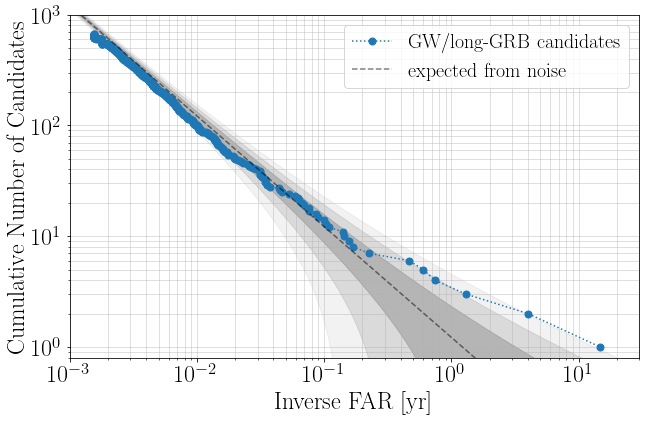

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ifar.values,np.arange(len(ifar))[::-1]+1,
        ls=':', 
        mec='C0',
        marker='.', alpha=1,
        label='GW/long-GRB candidates')

#plot expected
ax.plot(expected_x, expected_y, ls='--', color='black', 
            alpha=0.5,
            label='expected from noise')


#plot uncertainty
sig = (expected_y)**0.5
onesig_plus = expected_y + sig
onesig_minus = expected_y - sig
twosig_plus = expected_y + 2*sig
twosig_minus = expected_y - 2*sig
threesig_plus = expected_y + 3*sig
threesig_minus = expected_y - 3*sig

ax.fill_between(expected_x, onesig_minus, onesig_plus, facecolor='gray', edgecolor='gray',
                alpha=0.4)
ax.fill_between(expected_x, twosig_minus, twosig_plus, facecolor='gray', edgecolor='gray',
                alpha=0.2)
ax.fill_between(expected_x, threesig_minus, threesig_plus, facecolor='gray', edgecolor='gray',
                alpha=0.1)


ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_ylim(0.8,1000)
ax.set_xlim(1e-3,30)
ax.set_ylabel('Cumulative Number of Candidates')
ax.set_xlabel('Inverse FAR [yr]')
ax.grid(which='both', linestyle='-',alpha=0.5)
#ax.grid(b=True, which='minor', linestyle='--')
fig.savefig('logcumsum.png',bbox_inches='tight')

# Print the table

In [17]:
df.columns

Index(['gwname', 'gwtime', 'gwstat', 'grbname', 'grbtime', 'rank_stat',
       'false_alarm_rate'],
      dtype='object')

In [19]:
from pycbc.conversions import mchirp_from_mass1_mass2,primary_mass,secondary_mass,chi_eff
import h5py

In [20]:
gwfile = h5py.File('/work/ahnitz/WWW/4ogc/4-ogc.hdf')

In [21]:
gwfile.keys()

<KeysViewHDF5 ['H1_chisq', 'H1_end_time', 'H1_sg_chisq', 'H1_snr', 'L1_chisq', 'L1_end_time', 'L1_sg_chisq', 'L1_snr', 'V1_chisq', 'V1_end_time', 'V1_sg_chisq', 'V1_snr', 'ifar', 'mass1', 'mass2', 'name', 'obs', 'pastro', 'spin1z', 'spin2z', 'stat', 'time', 'trig']>

In [22]:
mc = []#chirp mass
obs=[]
for name in df['gwname']:
    i = np.where(gwfile['name'][:]==name.encode())[0]
    if len(i)>1:
        print('Warning!!')
    i=i[0]
    v = mchirp_from_mass1_mass2(gwfile['mass1'][i],gwfile['mass2'][i])
    print(name,i,v,gwfile['stat'][i])
    mc.append(v)
    obs.append(gwfile['obs'][i])

Warning!!
190804_185811 3891901 3.310695566479297 -2.8177506923675537
170331_013753 1289403 0.875444614908879 7.601306915283203
170130_071137 806233 1.4495702343378805 7.765566825866699
170306_070539 1086530 1.283865929332818 10.279637336730957
191213_060301 5235942 1.2399243991514086 6.3921709060668945
190424_095811 2567278 1.4037221712734609 8.610603332519531
190508_233956 2769141 2.198693087915224 7.993100166320801
200201_005417 5912550 2.3959280148689386 9.009533882141113
200205_201554 5979629 1.2451284202687594 4.7799530029296875
170705_044549 1794603 2.0338430723920684 6.116940975189209
190726_201252 3777878 1.3375735170200154 2.9676804542541504
200205_201716 5979639 1.0050254262812195 4.17529821395874
190919_181802 4528172 1.1663351608995807 4.7045135498046875
170330_222948 1287962 1.0471106918234148 6.86716365814209
200216_090501 6122998 1.065836405606421 3.989847183227539
191218_024032 5305132 2.5970724716622544 1.6767017841339111
Warning!!
190805_023044 3897575 3.724083967360

190707_064946 3549470 0.9532210203313529 0.4964529871940613
170111_003135 716538 2.462391880335586 1.0053337812423706
200131_223943 5910916 1.5281699379932319 0.37672048807144165
190623_110225 3375597 1.023710911618105 4.491982460021973
190831_163555 4261452 1.290850928388016 0.5625397562980652
190926_094941 4617615 0.8939176352907354 3.8111472129821777
200201_005445 5912556 1.4287409317161217 2.4064955711364746
170306_140553 1089567 1.2464741477851395 2.92991304397583
200216_090535 6123004 1.0909240820510433 0.9950767755508423
190406_110718 2343889 0.9074034612578215 0.48706310987472534
190716_002559 3632746 1.780151248550681 0.7772917151451111
151009_224412 152621 1.0691695830794814 4.121269226074219
200216_090724 6123028 0.8779375002910907 0.623393714427948
Warning!!
170822_090905 2225689 0.9891986832670542 1.5182404518127441
200208_011328 6010371 1.3897725255123679 4.942556381225586
Warning!!
200227_071746 6273450 3.3572820174744975 -0.43492770195007324
190630_235127 3470920 0.9667

191101_212809 4685067 1.742917318345358 2.5117602348327637
Warning!!
190831_075617 4255526 18.13008096552906 -6.430638790130615
Warning!!
200301_073931 6318079 2.739124149902695 1.3364918231964111
190507_062639 2751918 1.40839091271508 1.2917956113815308
190720_144122 3693803 1.604494822896936 2.14253306388855
170323_012021 1227333 0.9814739975508162 3.0961475372314453
151219_133339 495271 0.9075524342050852 1.504891276359558
170310_211125 1121800 0.8714056919197988 2.398371696472168
170419_132621 1456974 0.8720273411306326 2.2260513305664062
200131_224013 5910920 1.2168579989095416 0.7632363438606262
170614_060433 1629041 1.2821307120479182 1.3781102895736694
170219_023618 960314 0.8707717510672044 0.02800893783569336
Warning!!
190707_072202 3549857 2.109780407394629 -0.084850013256073
150912_103653 2093 1.7103824034359154 4.4049882888793945
161207_052209 631884 1.0156493688689066 2.861011505126953
200228_111233 6286823 0.9227673146562706 0.2777538299560547
200117_122322 5736595 0.988

151027_223931 234688 1.7664247499891832 0.5743190050125122
170317_155639 1176361 1.3158887555297614 1.4476341009140015
191110_140418 4802333 2.481838707032737 0.7164443731307983
170130_071333 806246 0.8756809432966695 1.2430452108383179
200114_033908 5694974 1.260074622561112 0.19020354747772217
190404_065845 2312099 1.3583368269258196 1.541955828666687
191117_000545 4877160 1.3363898934248517 3.191077709197998
170822_091000 2225702 3.3568743491982405 0.5925670862197876
200313_013937 6480303 1.1514450032974446 1.9268163442611694
190406_104558 2343622 1.2837502880859333 2.9804258346557617
190805_044316 3899208 1.3244264650151678 0.7133325934410095
151029_074746 244175 1.3396786187810044 0.6289786100387573
170414_131111 1407524 1.2923756942956504 0.14732682704925537
190507_231454 2759144 1.0916114860010613 0.8319324254989624
200112_123558 5667503 1.0779003391022046 1.4282945394515991
170209_010731 873394 2.0079123201169136 0.6199444532394409
170310_210918 1121785 1.5848510960007158 0.951

IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
df['gwname'].values[0]

'190804_185811'

In [29]:
i = np.where(gwfile['name'][:]==df['gwname'].values[0].encode())[0]

In [30]:
i

array([3891901, 3891902])

In [31]:
for ivalue in i:
    print('================')
    print('i is',ivalue)
    for k in gwfile.keys():
        print(k,gwfile[k][ivalue])

i is 3891901
H1_chisq -0.0
H1_end_time 1248980309.3769531
H1_sg_chisq 1.0
H1_snr 4.8514323234558105
L1_chisq -1.0
L1_end_time -1.0
L1_sg_chisq -1.0
L1_snr -1.0
V1_chisq -0.0
V1_end_time 1248980309.3520508
V1_sg_chisq 1.0
V1_snr 4.959570407867432
ifar 1.1620439960011381e-07
mass1 1.0510910644571423
mass2 19.011778843869884
name b'190804_185811'
obs b'HLV'
pastro -1.0
spin1z -0.01058270068849663
spin2z -0.7974155375911417
stat -2.8177506923675537
time 1248980309.364502
trig b'HV'
i is 3891902
H1_chisq 0.0
H1_end_time 1248980309.8671875
H1_sg_chisq 1.0
H1_snr 5.013528823852539
L1_chisq 2.01049562484499
L1_end_time 1248980309.8691406
L1_sg_chisq 1.0
L1_snr 6.322635173797607
V1_chisq -1.0
V1_end_time -1.0
V1_sg_chisq -1.0
V1_snr -1.0
ifar 0.0037687045175774474
mass1 1.3233562088900637
mass2 1.3411548430891604
name b'190804_185811'
obs b'HLV'
pastro -1.0
spin1z -0.03431665470042915
spin2z 0.047355796159408145
stat 11.397335052490234
time 1248980309.868164
trig b'HL'


In [27]:
obs

[b'HL',
 b'HL',
 b'HLV',
 b'HL',
 b'HLV',
 b'HLV',
 b'HLV',
 b'HLV',
 b'HL',
 b'HL',
 b'HLV',
 b'HLV',
 b'HL',
 b'HLV',
 b'HL',
 b'HL',
 b'HLV',
 b'HL',
 b'HL',
 b'HL',
 b'HLV',
 b'HL',
 b'HLV',
 b'HLV',
 b'HLV',
 b'HLV',
 b'HLV',
 b'HLV',
 b'HL',
 b'HLV',
 b'HL',
 b'HL']

In [28]:
df['mchirp'] = np.array(mc)

In [29]:
df['GWobs'] = np.array(obs)

In [32]:
for i in df.index:
    if (i+1)%2==0:
        #color='\\rowcolor{Gray}'
        color=''
    else:
        color=''
    print(color+' '+str(i+1)+' & '+df['gwname'][i][:6]+'\_'+df['gwname'][i][7:]+
                             ' & %.2f' % df['mchirp'][i]+
                             ' & '+df['grbname'][i][:3]+' '+df['grbname'][i][3:]+
                             ' & '+df['grbtime'][i][:22]+
                             ' & %.1f' % df['gwstat'][i]+
                             ' & %.1f' % df['rank_stat'][i]+
                             ' & %.2f' % (1/df['false_alarm_rate'][i]) + 
                             ' & '+str(df['GWobs'][i].decode())+
                             ' & %.0f' % df['exclusion_distance'][i] + ' \\\\')

 1 & 200205\_201716 & 1.01 & GRB 200205845 & 2020-02-05 20:17:23.32 & 4.2 & 5.5 & 2.20 & HL & 281 \\
 2 & 170330\_222948 & 1.05 & GRB 170330A & 2017-03-30 22:29:51.34 & 6.9 & 6.7 & 1.99 & HL & 191 \\
 3 & 191213\_060532 & 1.01 & GRB 191213254 & 2019-12-13 06:05:33.02 & 4.1 & 4.1 & 0.91 & HLV & 286 \\
 4 & 151001\_082025 & 1.12 & GRB 151001348 & 2015-10-01 08:20:35.16 & 3.2 & 5.2 & 0.73 & HL & 156 \\
 5 & 190404\_070114 & 1.03 & GRB 190404293 & 2019-04-04 07:01:21.92 & 1.7 & 3.9 & 0.67 & HLV & 341 \\
 6 & 191110\_140525 & 1.20 & GRB 191110587 & 2019-11-10 14:05:34.99 & 0.3 & 3.2 & 0.54 & HLV & 231 \\
 7 & 191213\_040623 & 1.53 & GRB 191213A & 2019-12-13 04:06:23.92 & 2.7 & 1.8 & 0.29 & HLV & 363 \\
 8 & 190701\_094513 & 1.03 & GRB 190701A & 2019-07-01 09:45:20.83 & 3.4 & 1.9 & 0.27 & HLV & 295 \\
 9 & 170723\_161524 & 0.97 & GRB 170723677 & 2017-07-23 16:15:27.85 & 1.8 & 2.2 & 0.21 & HL & 176 \\
 10 & 170409\_024157 & 0.88 & GRB 170409112 & 2017-04-09 02:42:00.49 & 1.9 & 2.1 & 0.20 & HL